# Machine Learning Utils - Classification example

###### Titanic dataset (Kaggle)  https://www.kaggle.com/hesh97/titanicdataset-traincsv

### 0 - Setup

###### Import pckgs 

In [57]:
from ml_utils import *
import warnings
warnings.filterwarnings("ignore")

###### Import data

In [2]:
dtf = pd.read_csv('data_titanic.csv')
dtf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


shape: (891, 12)
PassengerId --> Nas: 0 (0.0%)
    # possible pk
Survived --> Nas: 0 (0.0%)
Pclass --> Nas: 0 (0.0%)
Name --> Nas: 0 (0.0%)
    # possible pk
Sex --> Nas: 0 (0.0%)
Age --> Nas: 177 (19.900000000000002%)
SibSp --> Nas: 0 (0.0%)
Parch --> Nas: 0 (0.0%)
Ticket --> Nas: 0 (0.0%)
Fare --> Nas: 0 (0.0%)
Cabin --> Nas: 687 (77.10000000000001%)
Embarked --> Nas: 2 (0.2%)


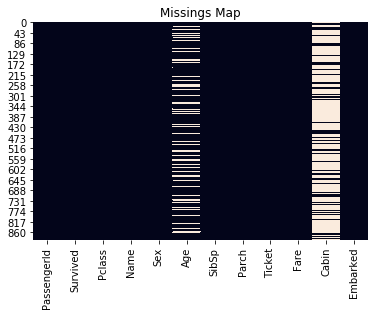

In [3]:
check_Nas(dtf, plot="map")

### 1 - Data Analysis

###### Group variables by info
- pk: PassengerId, Name
- y: Survived
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

In [4]:
features = []

###### Target Variable

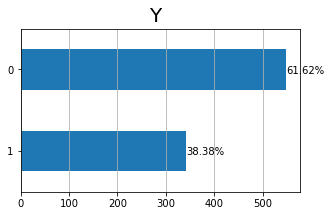

In [5]:
dtf = dtf.rename(columns={"Survived":"Y"})

freqdist_plot(dtf, "Y", figsize=(5,3))

In [6]:
#-> Population mean: 38% of the passengers survived

###### Who? Sex, Age, Embarked

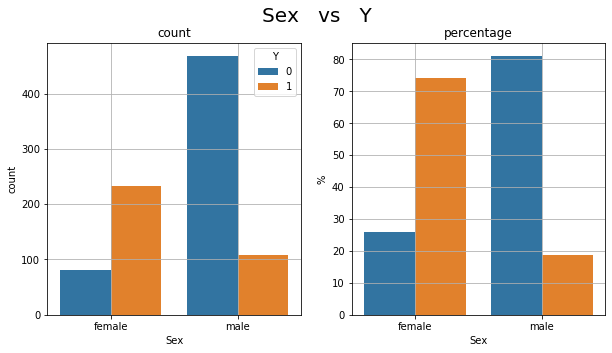

In [7]:
#--- Sex ----#
bivariate_plot(dtf, x="Sex", y="Y", figsize=(10,5))

In [8]:
#-> Sex is Predictive: the surviving rate of females is higher.
features.append("Sex")

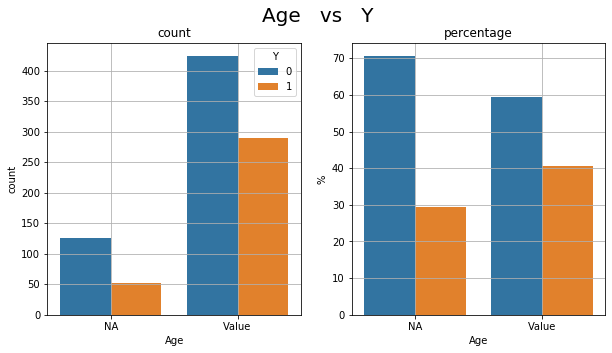

In [9]:
#--- Age ---#
nan_analysis(dtf, na_x="Age", y="Y", max_cat=20, figsize=(10,5))

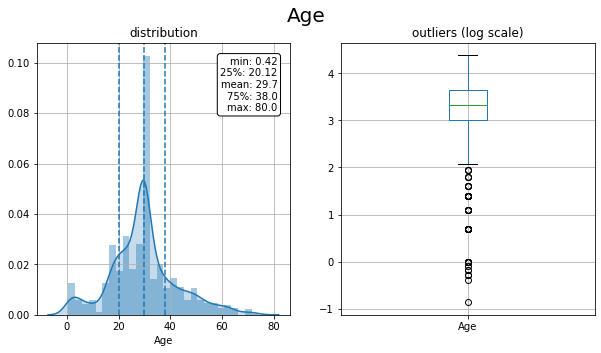

In [10]:
freqdist_plot(dtf, "Age", box_logscale=True, figsize=(10,5))

In [11]:
dtf["Age"] = dtf["Age"].fillna( dtf["Age"].mean() )

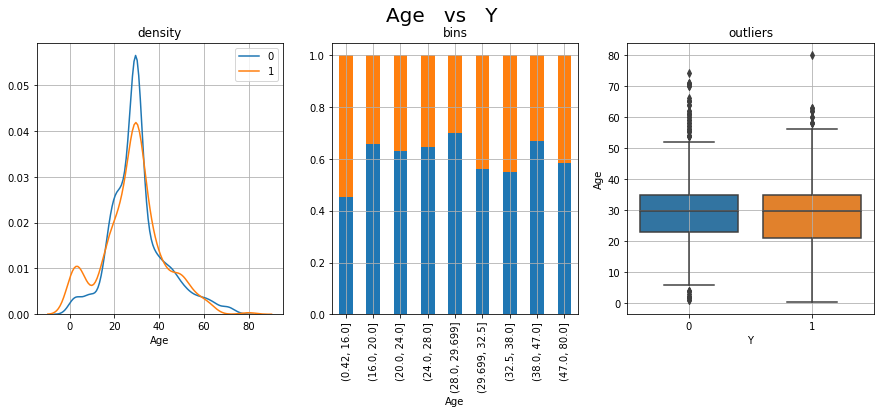

In [12]:
bivariate_plot(dtf, x="Age", y="Y", figsize=(15,5))

In [13]:
#-> Age is Predictive: the Surviving rate is higher for younger passengers, there is a spike in the left tail of Y=1 
# distribution and the first bin of Age (0-16) contains the highest percentage of survived people.
features.append("Age")

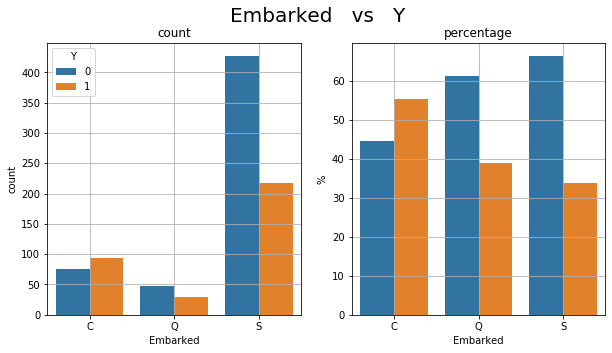

In [14]:
#--- Embarked ---#
bivariate_plot(dtf, x="Embarked", y="Y", figsize=(10,5))

In [15]:
coeff, p = test_corr(dtf, x="Embarked", y="Y")

Cramer Correlation: 0.166 Significant (p-value: 0.0)


In [16]:
#-> Embarked is Predictive: People from port C tend to survive better (that can be because they stayed in a fortunate area
# of the ship or just because they're smarter). Since there aren't many observations, I tested the significance 
# of the correlation (Cramer cat vs cat), it passed.
features.append("Embarked")

###### Wealth? Pclass, Ticket, Fare

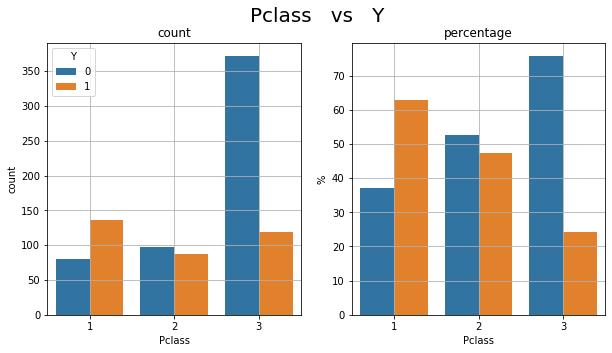

In [17]:
#--- Pclass ---#
bivariate_plot(dtf, x="Pclass", y="Y", figsize=(10,5))

In [18]:
#-> Pclass is Predctive: the richer the higher the probability of surviving.
features.append("Pclass")

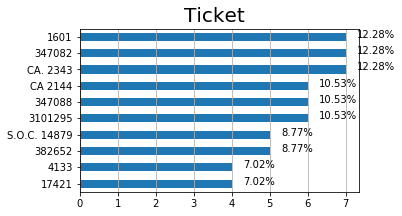

In [19]:
#--- Ticket ---#
freqdist_plot(dtf, "Ticket", top=10, figsize=(5,3))

In [20]:
#-> Ticket is Useless

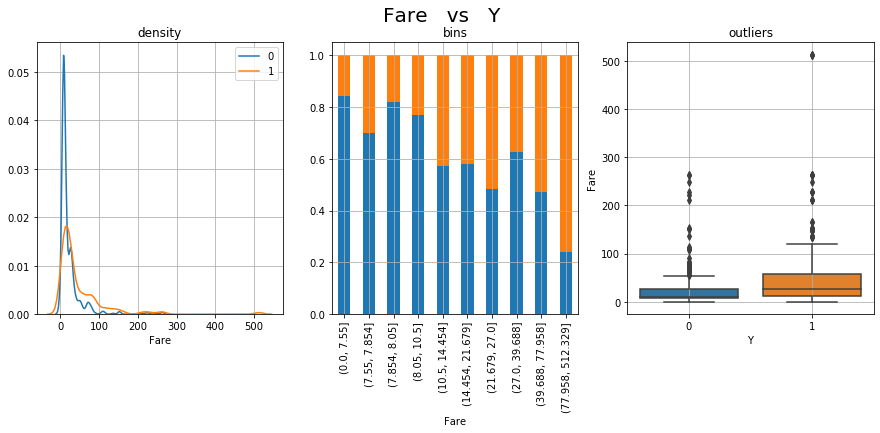

In [21]:
#--- Fare ---#
bivariate_plot(dtf, x="Fare", y="Y", figsize=(15,5))

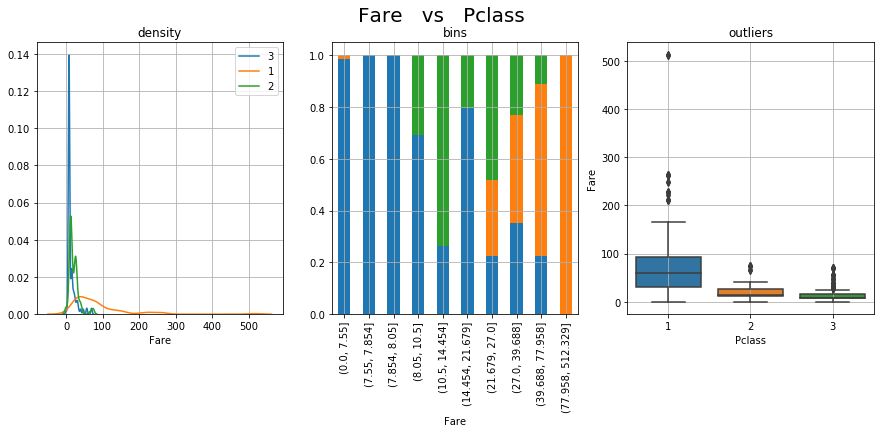

In [22]:
#-> Fare is Predictive: it gives the same info of Pclass
bivariate_plot(dtf, x="Fare", y="Pclass", figsize=(15,5))

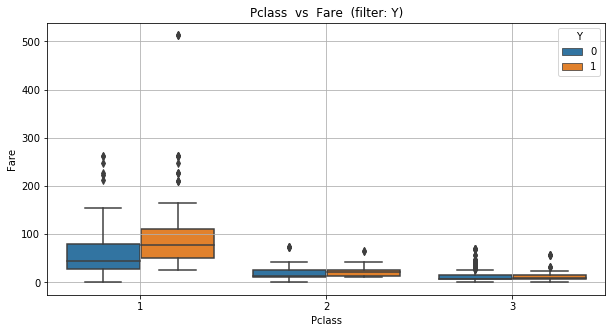

In [23]:
cross_distributions(dtf, x1="Pclass", x2="Fare", y="Y", figsize=(10,5))

In [24]:
#-> Looks there is more information in the first class: who paid higher price survived better.
# I will keep it for now and exclude one of the two in the Features Selection section.
features.append("Fare")

###### Where? Cabin

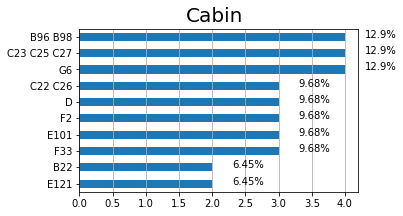

In [25]:
#--- Cabin ---#
freqdist_plot(dtf, "Cabin", top=10, figsize=(5,3))

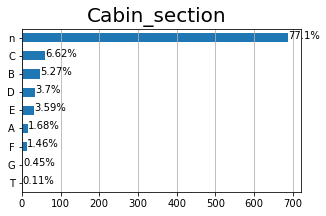

In [26]:
# Useless like this, let's see if the variable can be clustered using the first letter of the cabin:
dtf["Cabin_section"] = dtf["Cabin"].apply(lambda x: str(x)[0])
freqdist_plot(dtf, "Cabin_section", top=10, figsize=(5,3))

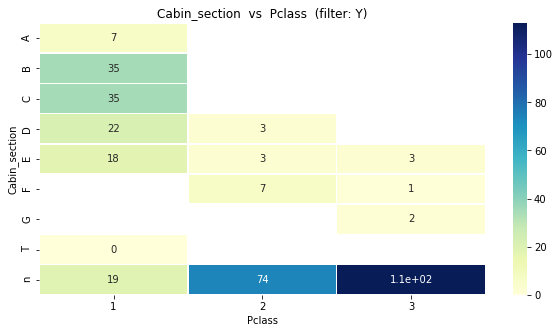

In [27]:
cross_distributions(dtf, x1="Cabin_section", x2="Pclass", y="Y", figsize=(10,5))

In [28]:
coeff, p = test_corr(dtf, x="Cabin_section", y="Y")

Cramer Correlation: 0.32 Significant (p-value: 0.0)


In [29]:
#-> Cabin_section is predictive: for now.
features.append("Cabin_section")

###### How many? SibSp, Parch

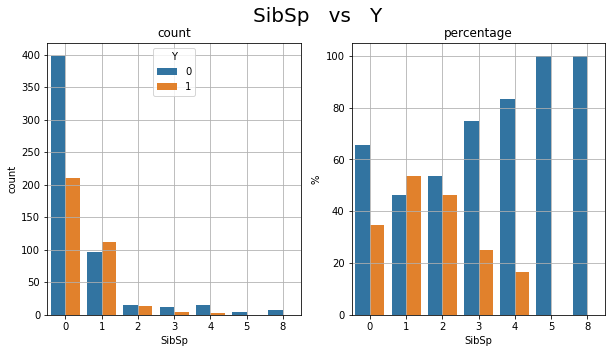

In [30]:
#--- SibSp ---#
bivariate_plot(dtf, x="SibSp", y="Y", figsize=(10,5))

In [31]:
coeff, p = test_corr(dtf, x="SibSp", y="Y")

Cramer Correlation: 0.187 Significant (p-value: 0.0)


In [32]:
#-> SibSp is predictive: for now.
features.append("SibSp")

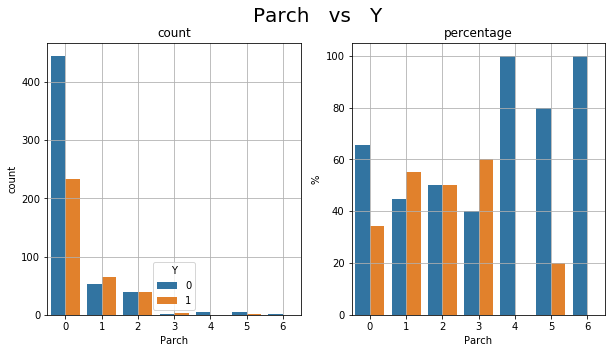

In [33]:
#--- Parch ---#
bivariate_plot(dtf, x="Parch", y="Y", figsize=(10,5))

In [34]:
coeff, p = test_corr(dtf, x="Parch", y="Y")

Cramer Correlation: 0.157 Significant (p-value: 0.0)


In [35]:
#-> Parch is predictive: for now.
features.append("Parch")

###### Summary

In [36]:
dtf = dtf[["PassengerId"]+features+["Y"]]
dtf.head()

,PassengerId,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,Y
0,1,male,22.0,S,3,7.2500,n,1,0,0
1,2,female,38.0,C,1,71.2833,C,1,0,1
2,3,female,26.0,S,3,7.9250,n,0,0,1
3,4,female,35.0,S,1,53.1000,C,1,0,1
4,5,male,35.0,S,3,8.0500,n,0,0,0


### 2 - Preprocessing

###### To do:
- treat missings
- encode categorical data
- partitioning dataset
- scaling features

In [37]:
check = data_preprocessing(dtf, pk="PassengerId", y="Y", task="classification",
                           processNas=None, processCategorical=None, split=None, scale=None)

--- check missing ---
--- check categorical data ---
--- split train/test ---
   OK: skipped this step
--- scaling ---
   OK: skipped this step


###### NAs

In [38]:
dtf = dtf[dtf["Embarked"].notnull()]
print(dtf.shape)

(889, 10)


###### Categorical

In [39]:
dtf = add_dummies(dtf, x="Embarked", dropx=True)

In [40]:
dtf = add_dummies(dtf, x="Sex", dropx=True)

In [41]:
dtf = add_dummies(dtf, x="Cabin_section", dropx=True)

###### Resample

In [42]:
# here just shuffle
dtf = dtf.sample(frac=1).reset_index(drop=True)

### 3 - Baseline (xgboost)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Partitioning train/test
- Train model
- Evaluate
- Explainer
- Visualize model

###### Features Selection

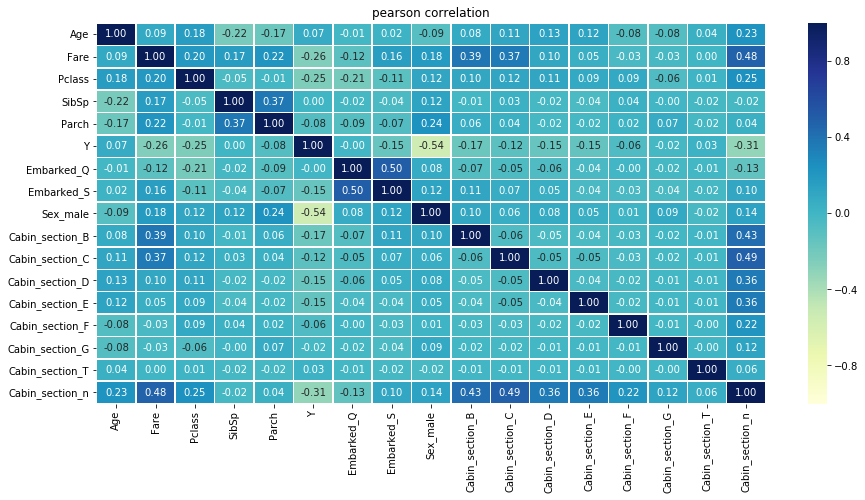

In [43]:
#--- correlation ---#
corr = corrmatrix_plot(dtf.drop("PassengerId",axis=1), method="pearson", annotation=True, figsize=(15,7))

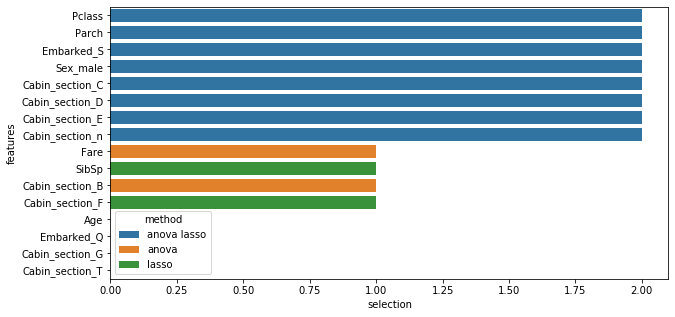

In [44]:
#--- p values ---#
dic_feat_sel = features_selection(dtf.drop("PassengerId",axis=1), y="Y", task="classification", top=10, figsize=(10,5))

--- model used ---
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


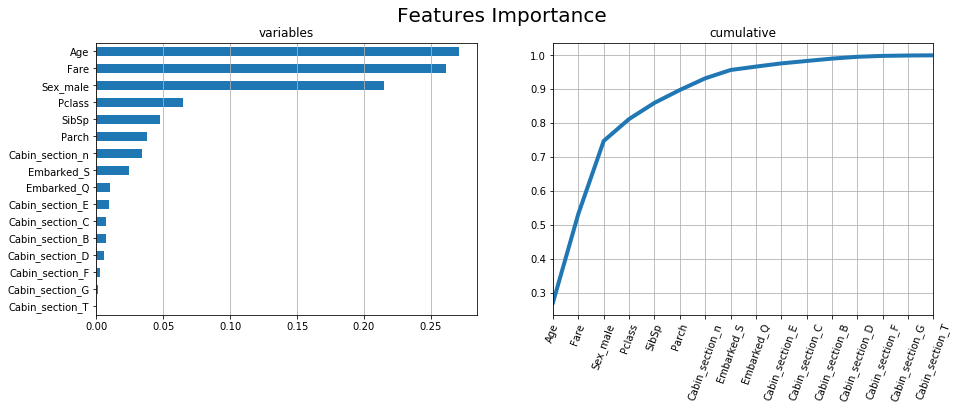

In [45]:
#--- importance ---#
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)

feat_imp = features_importance(X=dtf.drop(["PassengerId","Y"], axis=1).values, y=dtf["Y"].values, 
                               X_names=dtf.drop(["PassengerId","Y"], axis=1).columns.tolist(), 
                               model=model, task="classification", figsize=(15,5))

In [46]:
# -> selection
selected_features = ["Age","Fare","Sex_male","Pclass","SibSp","Parch","Cabin_section_n","Embarked_S"]

In [47]:
dtf_reduced = dtf[["PassengerId"]+selected_features+["Y"]] if len(selected_features)>0 else dtf
dtf_reduced.head()

,PassengerId,Age,Fare,Sex_male,Pclass,SibSp,Parch,Cabin_section_n,Embarked_S,Y
0,205,18.000000,8.05,1,3,0,0,1,1,1
1,283,16.000000,9.50,1,3,0,0,1,1,0
2,127,29.699118,7.75,1,3,0,0,1,0,0
3,490,9.000000,15.90,1,3,1,1,1,1,1
4,612,29.699118,7.05,1,3,0,0,1,1,0


###### Partitioning + Scaling

In [48]:
dic_data = data_preprocessing(dtf_reduced, pk="PassengerId", y="Y", task="classification",
                              processNas=None, processCategorical=None, split=0.3, scale="standard")

X_names = dic_data["X_names"]
X_train, X_test = dic_data["X"]
y_train, y_test = dic_data["y"]
scaler, _ = dic_data["scaler"]

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
X_train shape: (622, 8)  | X_test shape: (267, 8)
y_train mean: 0.39  | y_test mean: 0.37
8 features: ['Age', 'Fare', 'Sex_male', 'Pclass', 'SibSp', 'Parch', 'Cabin_section_n', 'Embarked_S']
--- scaling ---
   OK: scaled all features


###### Train

In [49]:
model = ensemble.GradientBoostingClassifier()

In [50]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #captures the number of trees that we add to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

--- RandomSearch ---
Best Model parameters: {'subsample': 0.8, 'n_estimators': 1250, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.01}
Best Model mean accuracy: 0.8472258064516129

--- Kfold Validation ---
mean accuracy base: 0.8310035842293907  --> best: 0.8246287762416795


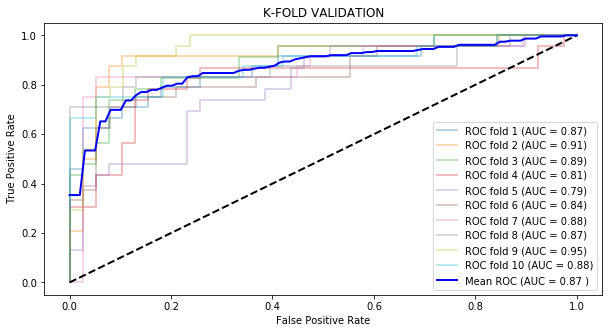

In [51]:
# this takes a while
model = tune_classif_model(X_train, y_train, model, param_dic, scoring="accuracy", 
                           searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))

In [52]:
model, predicted_prob, predicted = fit_classif_model(model, X_train, y_train, X_test, threshold=0.5)

###### Evaluate

Accuracy (overall correct predictions): 0.831
Auc: 0.888
Recall (ability to get all 1s): 0.67
Precision (success rate when predicting a 1): 0.862
Detail:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       164
           1       0.86      0.67      0.75       103

    accuracy                           0.83       267
   macro avg       0.84      0.80      0.81       267
weighted avg       0.84      0.83      0.83       267



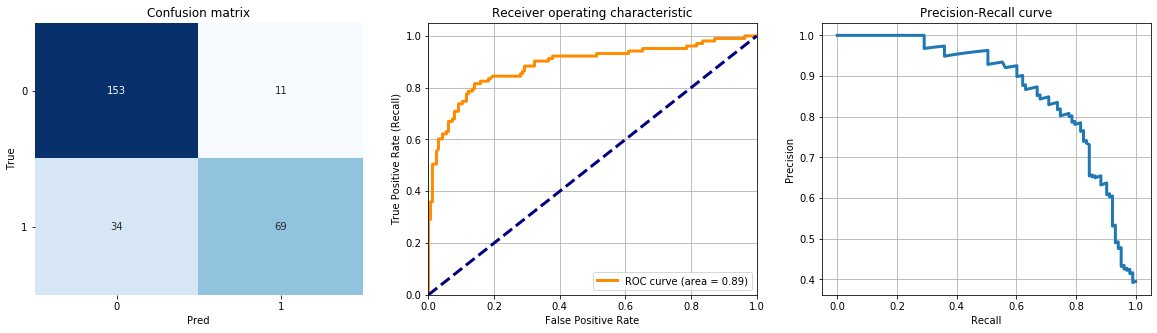

In [64]:
evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(20,5))

###### Visualize model

In [65]:
model2d = ensemble.GradientBoostingClassifier()
model2d.set_params(**{'subsample':1, 'n_estimators':1750, 'min_samples_split':6, 'min_samples_leaf':1, 'max_depth':4, 'learning_rate':0.001})

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=1750,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

--- unsupervised: pca ---
--- fitting 2d model ---
--- plotting test set ---


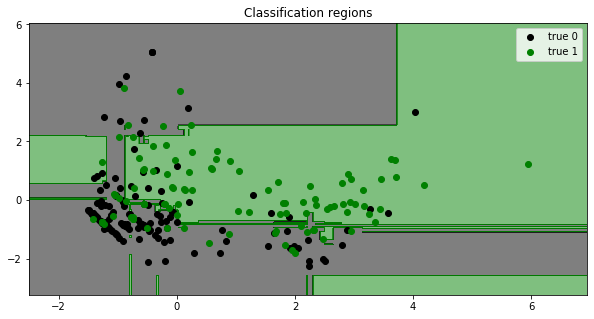

In [66]:
plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

###### Explainability

True: 0 --> Pred: False | Prob: 0.053134239655234984


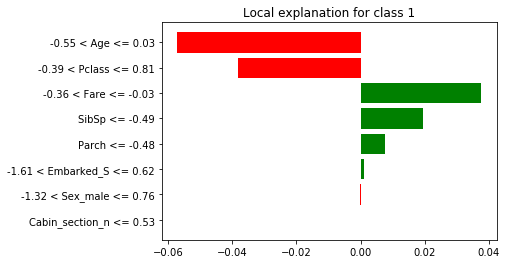

In [67]:
i = 0
print("True:", y_test[0], "--> Pred:", predicted[0], "| Prob:", np.max(predicted_prob[0]))

exp = explainer(X_train, X_names, model, y_train,  X_test_instance=X_test[i], top=10, task="classification")

### 4 - Model Desing & Testing (neural network)

###### Plan:
- Partitioning train/test
- Train model
- Evaluate
- Explainer
- Visualize model

###### Partitioning + Scaling

In [49]:
dic_data = data_preprocessing(dtf, pk="PassengerId", y="Y", task="classification",
                              processNas=None, processCategorical=None, split=0.3, scale="standard")

X_names = dic_data["X_names"]
X_train, X_test = dic_data["X"]
y_train, y_test = dic_data["y"]
scaler, _ = dic_data["scaler"]

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
X_train shape: (622, 16)  | X_test shape: (267, 16)
y_train mean: 0.39  | y_test mean: 0.37
16 features: ['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Cabin_section_B', 'Cabin_section_C', 'Cabin_section_D', 'Cabin_section_E', 'Cabin_section_F', 'Cabin_section_G', 'Cabin_section_T', 'Cabin_section_n']
--- scaling ---
   OK: scaled all features


###### Train

In [50]:
model = models.Sequential()
### layer 1
model.add(layers.Dense(input_dim=16, units=int(round((16+1)/2)), kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer 2
model.add(layers.Dense(units=int(round((16+1)/2)), kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer output
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


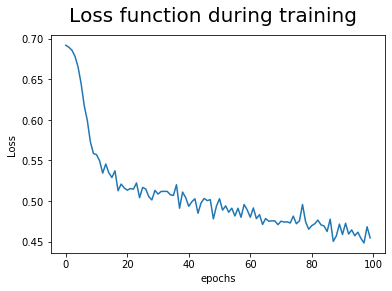

In [51]:
model, predicted_prob, predicted = fit_ann_classif(X_train, y_train, X_test, model, batch_size=32, epochs=100, threshold=0.5)

###### Evaluate

Accuracy (overall correct predictions): 0.798
Auc: 0.829
Recall (ability to get all 1s): 0.61
Precision (success rate when predicting a 1): 0.803
Detail:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       167
           1       0.80      0.61      0.69       100

    accuracy                           0.80       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.80      0.80      0.79       267



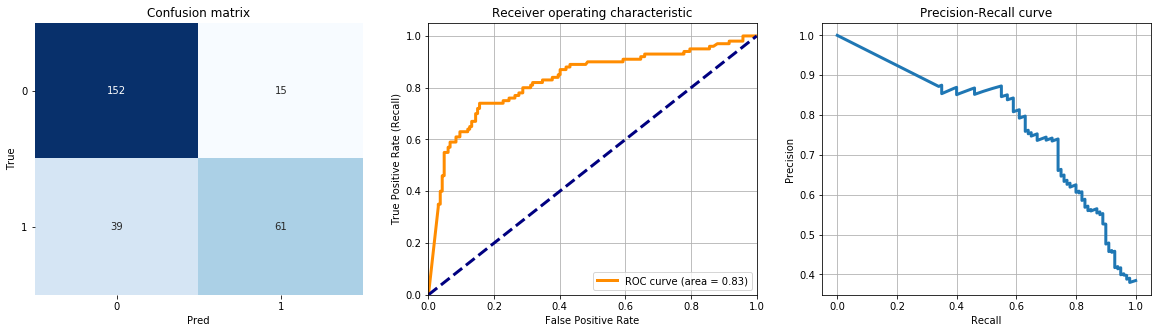

In [52]:
evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(20,5))

###### Visualize model

In [72]:
model2d = models.Sequential()
### layer 1
model2d.add(layers.Dense(input_dim=2, units=int(round((16+1)/2)), kernel_initializer='uniform', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer 2
model2d.add(layers.Dense(units=int(round((16+1)/2)), kernel_initializer='uniform', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer output
model2d.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model2d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

--- unsupervised: pca ---
--- fitting 2d model ---
622/622 [==============================] - 0s 703us/sample - loss: 0.6919 - acc: 0.6174
--- plotting test set ---


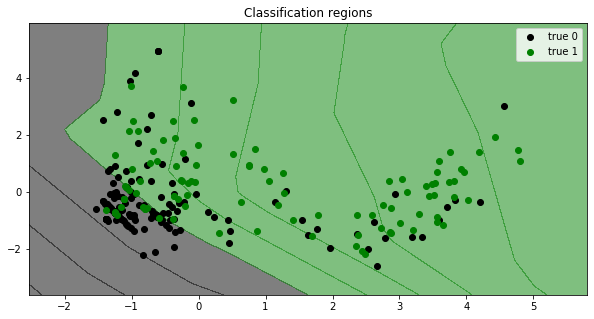

In [73]:
plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

###### Explainability

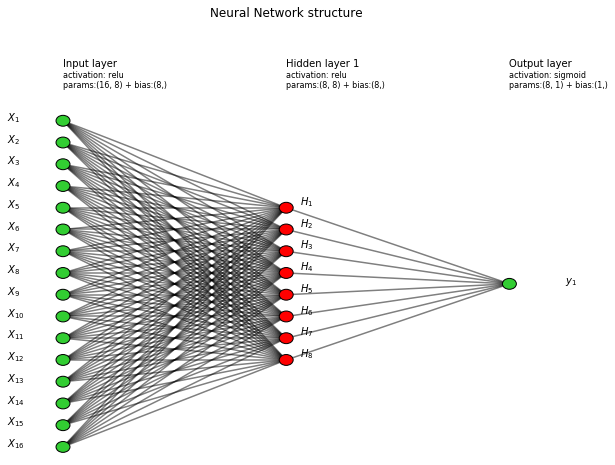

In [56]:
visualize_ann(model, titles=True, figsize=(10,8))